## MODELOS DE Feed Forward NN PARA DEMANDA DE GAS NATURAL EN SECTOR ELÉCTRICO EN MÉXICO


Importamos la data de Demanda de gas en sector eléctrico como un CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sympy import true
from datetime import datetime, timedelta
register_matplotlib_converters()
from time import time 

c:\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Se lee la data "original" de Demanda en sector eléctrico

In [2]:
csv_demanda_electrico_original = pd.read_csv('Demanda_electrico_2022_full1.csv',index_col='Date',parse_dates=True)
csv_demanda_electrico_original

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2022-05-01,3350.03
2022-06-01,3498.70
2022-07-01,3350.97


Se grafica la data "original" de Demanda en sector eléctrico

Text(0, 0.5, 'Demanda [MMpcd]')

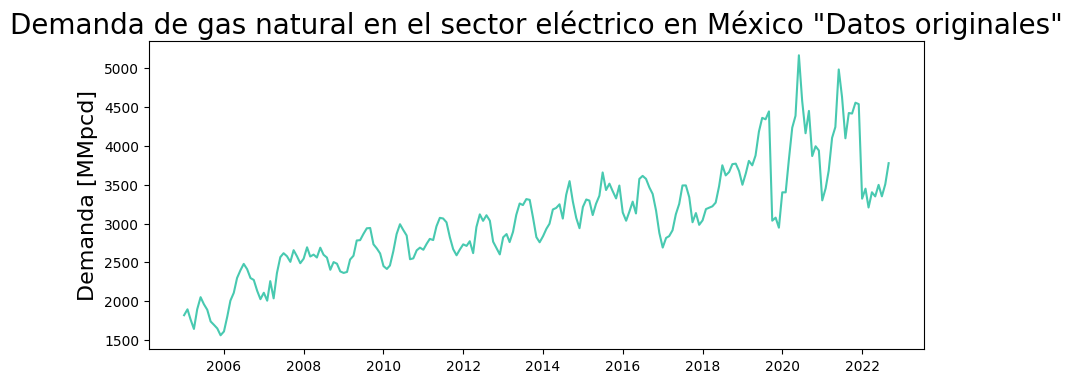

In [3]:
plt.figure(figsize=(10,4))
plt.plot(csv_demanda_electrico_original, color='#48C9B0')
plt.title('Demanda de gas natural en el sector eléctrico en México "Datos originales"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

Se descompone la data "original" de Demanda en sector eléctrico en sus compoentes de Tendencia, Estacionalidad y Residual

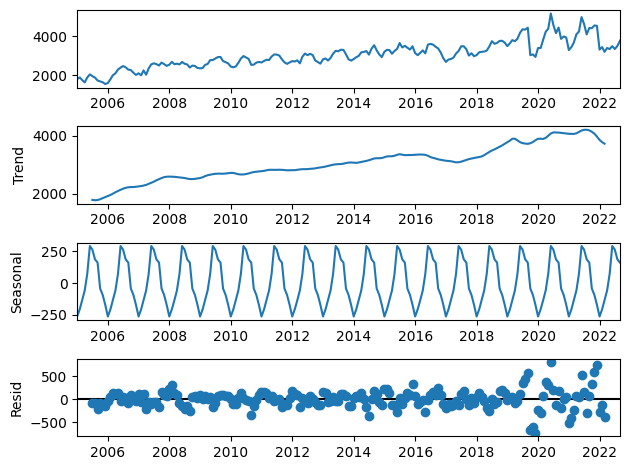

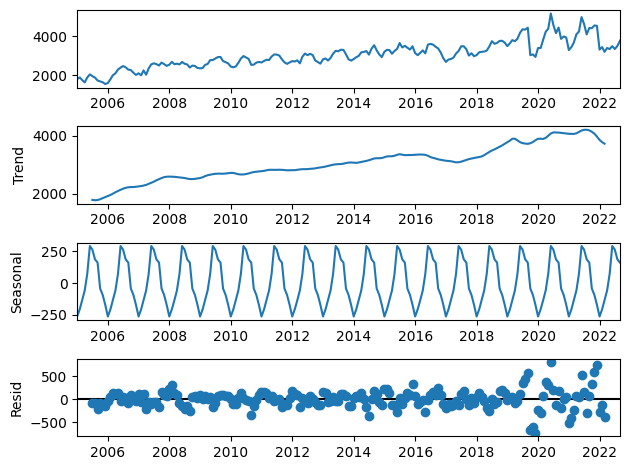

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

csv_demanda_electrico_original_seasonal_decomposition = seasonal_decompose(csv_demanda_electrico_original)
csv_demanda_electrico_original_seasonal_decomposition.plot()

Separamos la Demanda de gas natural en el sector eléctrico en data de train y test

In [5]:
# Number of data points to keep for testing (in this case, the last 12)
num_test_points = 12

# Split the data into training and testing sets
demanda_electrico_original_train_data = csv_demanda_electrico_original[:-num_test_points]
demanda_electrico_original_test_data = csv_demanda_electrico_original[-num_test_points:]

demanda_electrico_original_train_data

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2021-05-01,4243.93
2021-06-01,4985.53
2021-07-01,4631.85


Se grafica la distribución de la data "original" de Demanda en sector eléctrico

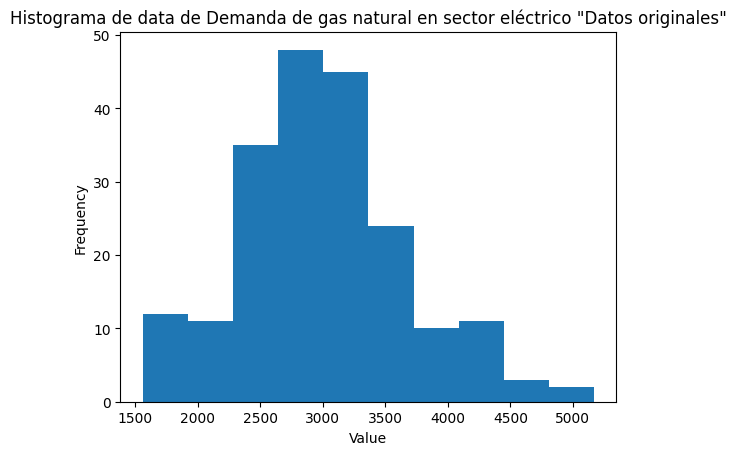

In [6]:
# Generate the histogram
plt.hist(demanda_electrico_original_train_data, bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector eléctrico "Datos originales"')

# Display the plot
plt.show()

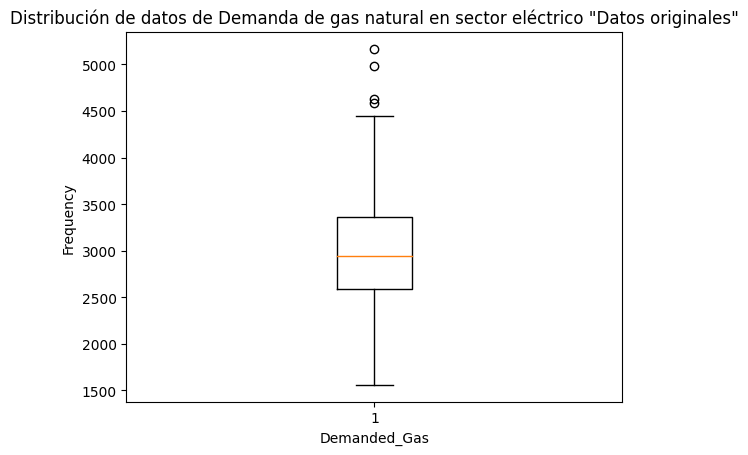

In [7]:
# Create a boxplot of the Demanded_Gas column
plt.boxplot(demanda_electrico_original_train_data)

# Add labels and title
plt.xlabel('Demanded_Gas')
plt.ylabel('Frequency')
plt.title('Distribución de datos de Demanda de gas natural en sector eléctrico "Datos originales"')

# Display the plot
plt.show()

Se generan sets de n_input datos para con ellos predecir el t+1 dato, y así los siguientes n_input para predecir el t+1, etc

In [8]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [9]:
n_input = 24

data = demanda_electrico_original_train_data['Demanded_Gas'].values
targets = data 

demanda_electrico_original_train_generator = TimeseriesGenerator(data, targets, length=n_input, batch_size=1)

In [10]:
demanda_electrico_original_train_generator[0]

(array([[1819.58, 1895.33, 1765.86, 1642.7 , 1895.54, 2051.72, 1962.05,
         1889.66, 1739.1 , 1695.92, 1648.95, 1560.98, 1610.45, 1806.33,
         2006.88, 2108.31, 2298.9 , 2398.88, 2480.62, 2413.08, 2298.49,
         2273.91, 2134.41, 2025.98]]),
 array([2108.85]))

In [11]:
print("Total number of samples in the original training data = ", len(demanda_electrico_original_train_data)) 
print("Total number of samples in the demanda_electrico_scaled_train_generator = ", len(demanda_electrico_original_train_generator))


Total number of samples in the original training data =  201
Total number of samples in the demanda_electrico_scaled_train_generator =  177


### Se define y entrena la FFNN  para el caso de la data original de Demanda en el sector eléctrico

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Se define la red neuronal sequencial FFNN con capas densas y funcion de activación tipo RELU.

La primer cada Dense constará de N, nodos y n_input inputs. Por lo que el número de parámetros a estimar para esta primer capa sería Parámetros_n_capa_densa = n_input * #Nodos + # Nodos Donde n_input * #Nodos: Representa la matriz de pesos Y # Nodos: el vector de bias

### Se define la arquitectura de la FFNN a usar  

In [13]:
n_input = 24
n_features = 1

# define model
model_FF_electrico_sin_tratamiento = Sequential()
model_FF_electrico_sin_tratamiento.add(Dense(64, activation='relu', input_shape=(n_input, n_features)))
model_FF_electrico_sin_tratamiento.add(Dense(32, activation='relu'))
model_FF_electrico_sin_tratamiento.add(Dense(1))
model_FF_electrico_sin_tratamiento.compile(optimizer='Adam', loss='mse')

In [14]:
model_FF_electrico_sin_tratamiento.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24, 64)            128       
                                                                 
 dense_1 (Dense)             (None, 24, 32)            2080      
                                                                 
 dense_2 (Dense)             (None, 24, 1)             33        
                                                                 
Total params: 2241 (8.75 KB)
Trainable params: 2241 (8.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Entrenamos el modelo Feed Forward Sequential Neural Network con el demanda_electrico_scaled_train_generator. Es decir se está entrenando al modelo para que con los valores de entrenamiento "ajuste sus pesos y bias" de manera que se esté tomando n_inputs como "variables predictoas" y el +1 valor después de los n_input como variable dependiente Y. y asñi se va recorriendo el n_input. De manera que se tienen n_total_elementos_en_train - n_input valores de entrada de tamaño n_input y n_total_elementos_en_train - n_input valores de salida de tamaño 1 (Representando la Y calculada)

In [15]:
model_FF_electrico_sin_tratamiento.fit(demanda_electrico_original_train_generator, epochs=15)


Epoch 1/15
177/177 [==============================] - 1s 2ms/step - loss: 2310396.5000
Epoch 2/15
177/177 [==============================] - 0s 2ms/step - loss: 184570.1875
Epoch 3/15
177/177 [==============================] - 0s 2ms/step - loss: 189552.4531
Epoch 4/15
177/177 [==============================] - 0s 3ms/step - loss: 187343.9375
Epoch 5/15
177/177 [==============================] - 0s 2ms/step - loss: 183121.3750
Epoch 6/15
177/177 [==============================] - 0s 2ms/step - loss: 188738.7812
Epoch 7/15
177/177 [==============================] - 0s 2ms/step - loss: 186410.9844
Epoch 8/15
177/177 [==============================] - 0s 3ms/step - loss: 184706.4375
Epoch 9/15
177/177 [==============================] - 0s 2ms/step - loss: 188255.2812
Epoch 10/15
177/177 [==============================] - 0s 3ms/step - loss: 184980.4219
Epoch 11/15
177/177 [==============================] - 0s 2ms/step - loss: 189852.7969
Epoch 12/15
177/177 [==============================

Se grafica la perdida por epoch

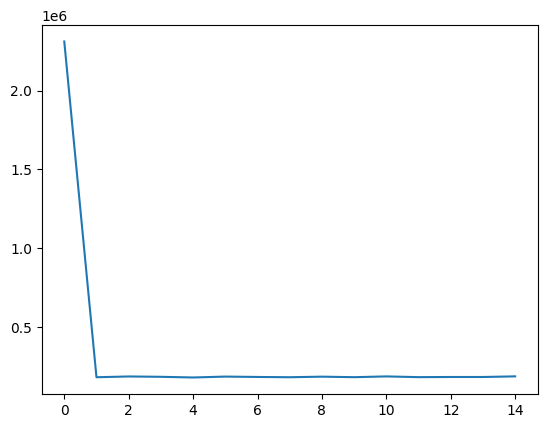

In [16]:
loss_per_epoch_model_FF = model_FF_electrico_sin_tratamiento.history.history['loss']
plt.plot(range(len(loss_per_epoch_model_FF)),loss_per_epoch_model_FF)

### Se lleva a cabo el forecast de los ultimos 12 meses usando el modelo model_sequential_and_FF previamente definido y entrenado

Se toman los ULTIMOS n_input elementos de los datos de train y se almacenan en un batch

In [17]:
data = demanda_electrico_original_train_data['Demanded_Gas'].values

demanda_electrico_train_batch_sin_tratamiento = data[-n_input:]

demanda_electrico_train_batch_sin_tratamiento

array([3037.44, 3076.62, 2947.09, 3402.47, 3402.47, 3819.3 , 4235.25,
       4387.91, 5168.27, 4581.99, 4163.77, 4451.61, 3869.77, 3996.14,
       3941.12, 3298.43, 3454.21, 3681.3 , 4104.82, 4243.93, 4985.53,
       4631.85, 4098.81, 4424.39])

Se reescala el batch de los datos de train a que tenga la misma forma que los datos con que se entrenó el modelo que fueron 1, input_shape=(n_input, n_features)

In [18]:
demanda_electrico_train_batch_sin_tratamiento_reshaped = demanda_electrico_train_batch_sin_tratamiento.reshape(1,n_input, n_features)
demanda_electrico_train_batch_sin_tratamiento_reshaped

array([[[3037.44],
        [3076.62],
        [2947.09],
        [3402.47],
        [3402.47],
        [3819.3 ],
        [4235.25],
        [4387.91],
        [5168.27],
        [4581.99],
        [4163.77],
        [4451.61],
        [3869.77],
        [3996.14],
        [3941.12],
        [3298.43],
        [3454.21],
        [3681.3 ],
        [4104.82],
        [4243.93],
        [4985.53],
        [4631.85],
        [4098.81],
        [4424.39]]])

Intentamos predecir el sigueinte valor dado el primet batch de n_input. Esto equivaldria a predecir el primer valor de los datos de test (PUES SE ESTÁN TOMANDO EXACTAMENTE LOS ULTIMOS VALORES DE LOS DATOS DE TRAIN EN EL BATCH), dados los n_input anteriores (QUE FORMAN BARTE DEL BATCH)

In [19]:
model_FF_electrico_sin_tratamiento.predict(demanda_electrico_train_batch_sin_tratamiento_reshaped)

1/1 [==============================] - 0s 174ms/step


array([[[3117.9673],
        [3158.1565],
        [3025.2905],
        [3492.399 ],
        [3492.399 ],
        [3919.9634],
        [4346.626 ],
        [4503.218 ],
        [5303.676 ],
        [4702.2964],
        [4273.305 ],
        [4568.558 ],
        [3971.7334],
        [4101.358 ],
        [4044.9214],
        [3385.6792],
        [3545.4712],
        [3778.4097],
        [4212.8364],
        [4355.53  ],
        [5116.229 ],
        [4753.4404],
        [4206.6724],
        [4540.637 ]]], dtype=float32)

Y se observa el valor predicho para la demanda de gas en el primer mes o dato de prueba como función de los n datos anteriores y dado el modelo model_sequential_and_FF

In [20]:
model_FF_electrico_sin_tratamiento.predict(demanda_electrico_train_batch_sin_tratamiento_reshaped)[0][-1][0]

1/1 [==============================] - 0s 23ms/step


4540.637

Y se compara el valor de forecast del modelo model_sequential_and_FF con los datos de test de la demanda de gasd natural en sector eléctrico

In [21]:
demanda_electrico_original_test_data['Demanded_Gas'].values[0]

4417.51

#### Ahora ser hará una función que irá formando batch de n_input para ir prediciendo el siguiente valor, tal como se hizo en el entrenamiento del modelo

In [22]:
n_input = 24
n_features = 1

In [23]:
test_predictions_model_FF_electrico_sin_pretratamiento = []

first_eval_batch = demanda_electrico_original_train_data['Demanded_Gas'].values[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(demanda_electrico_original_test_data['Demanded_Gas'])):
    
    # get the prediction value for the first batch
    current_pred = model_FF_electrico_sin_tratamiento.predict(current_batch)[0][-1][0]
    
    # append the prediction into the array
    test_predictions_model_FF_electrico_sin_pretratamiento.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[[current_pred]]],axis=1)
    current_batch = current_batch.reshape((1, n_input, n_features))  # Reshape to maintain the 3D shape
    

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 32ms/step


In [24]:
test_predictions_model_FF_electrico_sin_pretratamiento

[4540.637,
 4659.878,
 4782.19,
 4907.652,
 5036.345,
 5168.353,
 5303.7603,
 5442.655,
 5585.1265,
 5731.2676,
 5881.1724,
 6034.937]

In [25]:
import numpy as np

# Convert the Python list to a NumPy array
test_predictions_model_FF_electrico_sin_pretratamiento_array = np.array(test_predictions_model_FF_electrico_sin_pretratamiento)

# Assuming test_predictions is your 1D array
# Reshape it into a 2D array with a single column
test_predictions_model_FF_sin_pretratamiento_rescaled = test_predictions_model_FF_electrico_sin_pretratamiento_array.reshape(-1, 1)

test_predictions_model_FF_sin_pretratamiento_rescaled

array([[4540.637 ],
       [4659.878 ],
       [4782.19  ],
       [4907.652 ],
       [5036.345 ],
       [5168.353 ],
       [5303.7603],
       [5442.655 ],
       [5585.1265],
       [5731.2676],
       [5881.1724],
       [6034.937 ]], dtype=float32)

Se grafican los 12 meses de test vs el forecast del modelo FFNN sin la data pretratada

Text(0, 0.5, 'Demanda [MMpcd]')

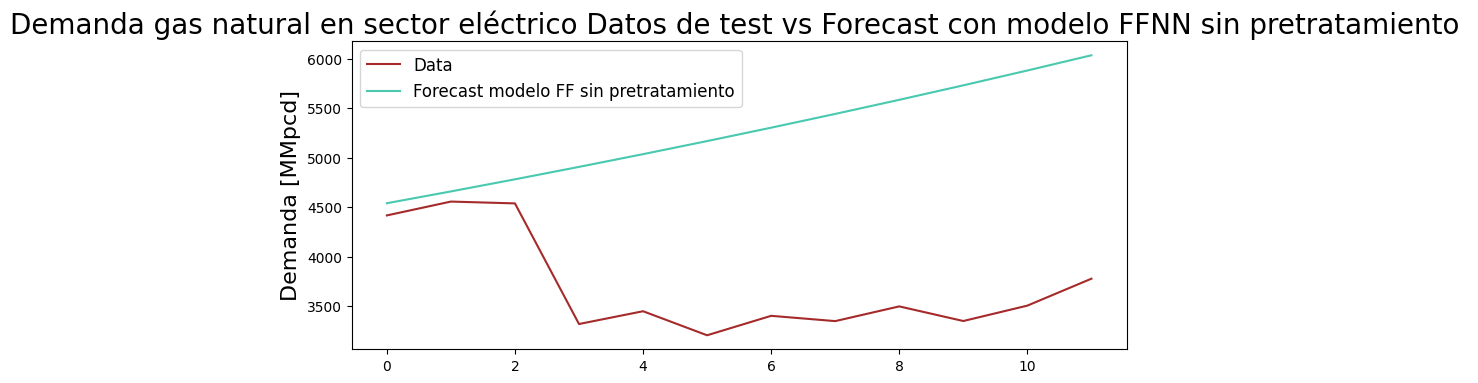

In [26]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'].values, color='brown')
plt.plot(test_predictions_model_FF_sin_pretratamiento_rescaled, color='#48C9B0')
plt.legend(('Data', 'Forecast modelo FF sin pretratamiento'), fontsize=12)

plt.title('Demanda gas natural en sector eléctrico Datos de test vs Forecast con modelo FFNN sin pretratamiento ', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Se calcula el error de pronóstico para los 12 meses de test con  modelo FFNN sin la data pretratada

In [27]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_FF_electrico_sin_pretratamiento = mean_absolute_percentage_error(demanda_electrico_original_test_data['Demanded_Gas'].values, test_predictions_model_FF_sin_pretratamiento_rescaled)
RMSE_predictions_model_FF_electrico_sin_pretratamiento= np.sqrt(mean_squared_error(demanda_electrico_original_test_data['Demanded_Gas'].values, test_predictions_model_FF_sin_pretratamiento_rescaled))

print('MAPE:', MAPE_predictions_model_FF_electrico_sin_pretratamiento)
print('RMSE:', RMSE_predictions_model_FF_electrico_sin_pretratamiento)

MAPE: 0.4514601934207511
RMSE: 1772.6661158554675


## Proceso de Pretratamiento (Ajuste de valores atípicos por media aritmetica o mediana de serie) como una estrategia para mejorar los resultados de forecast de modelos Feed Forward Neural Networks

## Proceso de Pretratamiento Ajuste de valores atípicos por media aritmetica 

In [28]:
import numpy as np
import tensorflow as tf

# Set a seed for numpy random number generation
np.random.seed(0)

# Set a seed for TensorFlow random number generation
tf.random.set_seed(0)

In [30]:
outlier_threshold = 1.2

import pandas as pd

def remove_replace_outliers_media(data):
    # Calculate Q1 and Q3
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers_mask = (data < (Q1 - outlier_threshold * IQR)) | (data > (Q3 + outlier_threshold * IQR))

    # Calculate the historical mean excluding outliers
    historical_mean = data[~outliers_mask].mean()

    # Replace outliers with historical mean
    data.loc[outliers_mask] = historical_mean

    return data

In [31]:
csv_demanda_electrico_original_para_tratamiento =csv_demanda_electrico_original.copy()
csv_demanda_electrico_original_para_tratamiento

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2022-05-01,3350.03
2022-06-01,3498.70
2022-07-01,3350.97


In [33]:
demanda_electrico_pretratamiento_media = remove_replace_outliers_media(csv_demanda_electrico_original_para_tratamiento['Demanded_Gas'])
demanda_electrico_pretratamiento_media

Date
2005-01-01    1819.580000
2005-02-01    1895.330000
2005-03-01    2960.289359
2005-04-01    2960.289359
2005-05-01    1895.540000
                 ...     
2022-05-01    3350.030000
2022-06-01    3498.700000
2022-07-01    3350.970000
2022-08-01    3506.420000
2022-09-01    3778.370000
Name: Demanded_Gas, Length: 213, dtype: float64

Separamos la Demanda de gas natural en el sector eléctrico en data de train y test

In [34]:
# Number of data points to keep for testing (in this case, the last 12)
num_test_points = 12

# Split the data into training and testing sets
demanda_electrico_train_data_pretratamiento_media = demanda_electrico_pretratamiento_media[:-num_test_points]
demanda_electrico_test_data_pretratamiento_media = demanda_electrico_pretratamiento_media[-num_test_points:]

demanda_electrico_train_data_pretratamiento_media

Date
2005-01-01    1819.580000
2005-02-01    1895.330000
2005-03-01    2960.289359
2005-04-01    2960.289359
2005-05-01    1895.540000
                 ...     
2021-05-01    2960.289359
2021-06-01    2967.156200
2021-07-01    2967.156200
2021-08-01    4098.810000
2021-09-01    2967.156200
Name: Demanded_Gas, Length: 201, dtype: float64

Se generan sets de n_input datos para con ellos predecir el t+1 dato, y así los siguientes n_input para predecir el t+1, etc 

Se aplica el TimeseriesGnerator para producir sets de n_inputs + 1 output para el caso de

In [35]:
n_input = 24

data = demanda_electrico_train_data_pretratamiento_media
targets = data 

demanda_electrico_train_generator_pretratamiento_media = TimeseriesGenerator(data, targets, length=n_input, batch_size=1)


In [36]:
demanda_electrico_train_generator_pretratamiento_media[0]

(array([[1819.58      , 1895.33      , 2960.28935941, 2960.28935941,
         1895.54      , 2051.72      , 1962.05      , 1889.66      ,
         2960.28935941, 2960.28935941, 2960.28935941, 2967.1562    ,
         2967.1562    , 1806.33      , 2006.88      , 2108.31      ,
         2298.9       , 2398.88      , 2480.62      , 2413.08      ,
         2298.49      , 2273.91      , 2134.41      , 2025.98      ]]),
 array([2108.85]))

Y entonces el numero de muestras formadas con el TimeseriesGenerator = Numero de elementos de array original - n_input

In [37]:
print("Total number of samples in the original training data = ", len(demanda_electrico_train_data_pretratamiento_media)) 
print("Total number of samples in the demanda_electrico_scaled_train_generator = ", len(demanda_electrico_train_generator_pretratamiento_media))

Total number of samples in the original training data =  201
Total number of samples in the demanda_electrico_scaled_train_generator =  177


Se define la red neuronal sequencial FFNN con capas densas y funcion de activación tipo RELU.  

In [39]:
n_input = 24
n_features = 1

# define model
model_FF_electrico_pretrataminto_media = Sequential()
model_FF_electrico_pretrataminto_media.add(Dense(64, activation='relu', input_shape=(n_input, n_features)))
model_FF_electrico_pretrataminto_media.add(Dense(32, activation='relu'))
model_FF_electrico_pretrataminto_media.add(Dense(1))
model_FF_electrico_pretrataminto_media.compile(optimizer='Adam', loss='mse')

In [40]:
model_FF_electrico_pretrataminto_media.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 24, 64)            128       
                                                                 
 dense_7 (Dense)             (None, 24, 32)            2080      
                                                                 
 dense_8 (Dense)             (None, 24, 1)             33        
                                                                 
Total params: 2241 (8.75 KB)
Trainable params: 2241 (8.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Entrenamos el modelo  Feed Forward Sequential Neural Network con el demanda_electrico_scaled_train_generator.
Es decir se está entrenando al modelo para que con los valores de entrenamiento "ajuste sus pesos y bias" de manera que se esté tomando n_inputs como "variables predictoas" y el +1 valor después de los n_input como variable dependiente Y. y asñi se va recorriendo el n_input. De manera que se tienen n_total_elementos_en_train - n_input valores de entrada de tamaño n_input y n_total_elementos_en_train - n_input valores de salida de tamaño 1 (Representando la Y calculada)  

In [44]:
model_FF_electrico_pretrataminto_media.fit(demanda_electrico_train_generator_pretratamiento_media, epochs=25)

Epoch 1/25
  1/177 [..............................] - ETA: 2s - loss: 154686.1719

177/177 [==============================] - 1s 3ms/step - loss: 157966.1875
Epoch 2/25
177/177 [==============================] - 0s 2ms/step - loss: 148369.5781
Epoch 3/25
177/177 [==============================] - 0s 2ms/step - loss: 160461.7969
Epoch 4/25
177/177 [==============================] - 0s 2ms/step - loss: 155284.7188
Epoch 5/25
177/177 [==============================] - 0s 2ms/step - loss: 158040.2188
Epoch 6/25
177/177 [==============================] - 0s 2ms/step - loss: 155064.1719
Epoch 7/25
177/177 [==============================] - 0s 2ms/step - loss: 154713.5000
Epoch 8/25
177/177 [==============================] - 0s 2ms/step - loss: 151815.0938
Epoch 9/25
177/177 [==============================] - 0s 2ms/step - loss: 155736.2031
Epoch 10/25
177/177 [==============================] - 0s 2ms/step - loss: 152829.0312
Epoch 11/25
177/177 [==============================] - 0s 2ms/step - loss: 158316.0938
Epoch 12/25
177/177 [==============================] - 1s 3ms/s

Se grafica la perdida por epoch 

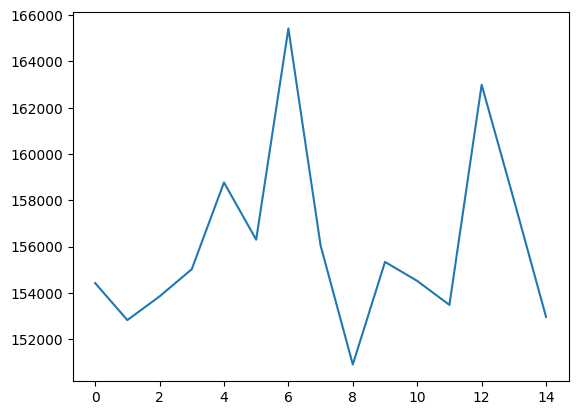

In [43]:
loss_per_epoch = model_FF_electrico_pretrataminto_media.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

Se lleva a cabo el forecast de los ultimos 12 meses usando el modelo model_sequential_and_FF previamente definido y entrenado

Se toman los **ULTIMOS** n_input elementos de los **datos de train** y se almacenan en un batch

In [48]:
demanda_electrico_train_batch_pretratamiento_media = demanda_electrico_train_data_pretratamiento_media.values[-n_input:]


demanda_electrico_train_batch_pretratamiento_media

array([3037.44      , 3076.62      , 2947.09      , 3402.47      ,
       3402.47      , 3819.3       , 2960.28935941, 2967.1562    ,
       2967.1562    , 2967.1562    , 2960.28935941, 2967.1562    ,
       3869.77      , 3996.14      , 3941.12      , 3298.43      ,
       3454.21      , 3681.3       , 4104.82      , 2960.28935941,
       2967.1562    , 2967.1562    , 4098.81      , 2967.1562    ])

Se reescala el batch de los datos de train a que tenga la misma forma que los datos con que se entrenó el modelo que fueron  1, input_shape=(n_input, n_features)

In [49]:
demanda_electrico_train_batch_pretratamiento_media_reshaped = demanda_electrico_train_batch_pretratamiento_media.reshape(1,n_input, n_features)
demanda_electrico_train_batch_pretratamiento_media_reshaped

array([[[3037.44      ],
        [3076.62      ],
        [2947.09      ],
        [3402.47      ],
        [3402.47      ],
        [3819.3       ],
        [2960.28935941],
        [2967.1562    ],
        [2967.1562    ],
        [2967.1562    ],
        [2960.28935941],
        [2967.1562    ],
        [3869.77      ],
        [3996.14      ],
        [3941.12      ],
        [3298.43      ],
        [3454.21      ],
        [3681.3       ],
        [4104.82      ],
        [2960.28935941],
        [2967.1562    ],
        [2967.1562    ],
        [4098.81      ],
        [2967.1562    ]]])

Intentamos predecir el sigueinte valor dado el primet batch de n_input. Esto equivaldria a predecir el primer valor de los datos de test (PUES SE ESTÁN TOMANDO EXACTAMENTE LOS ULTIMOS VALORES DE LOS DATOS DE TRAIN EN EL BATCH), dados los n_input anteriores (QUE FORMAN BARTE DEL BATCH)

In [50]:
model_FF_electrico_pretrataminto_media.predict(demanda_electrico_train_batch_pretratamiento_media_reshaped)

1/1 [==============================] - 0s 149ms/step


array([[[3143.685 ],
        [3184.1172],
        [3050.4478],
        [3520.3809],
        [3520.3809],
        [3950.5317],
        [3064.0688],
        [3071.155 ],
        [3071.155 ],
        [3071.155 ],
        [3064.0688],
        [3071.155 ],
        [4002.6152],
        [4133.0234],
        [4076.2456],
        [3413.0159],
        [3573.7744],
        [3808.1216],
        [4245.177 ],
        [3064.0688],
        [3071.155 ],
        [3071.155 ],
        [4238.9746],
        [3071.155 ]]], dtype=float32)

Y se observa el valor predicho ESCALADO para la demanda de gas en el primer mes o dato de prueba como función de los n datos anteriores y dado el modelo model_sequential_and_FF

In [51]:
model_FF_electrico_pretrataminto_media.predict(demanda_electrico_train_batch_pretratamiento_media_reshaped)[0][-1][0]

1/1 [==============================] - 0s 26ms/step


3071.155

Ahora ser hará una función que irá formando batch de n_input para ir prediciendo el siguiente valor, tal como se hizo en el entrenamiento del modelo

In [52]:
n_input = 24
n_features = 1

In [53]:
test_predictions_model_FF_electrico_pretratamiento_media  = []

first_eval_batch = demanda_electrico_train_data_pretratamiento_media.values[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(demanda_electrico_test_data_pretratamiento_media)):
    
    # get the prediction value for the first batch
    current_pred = model_FF_electrico_pretrataminto_media.predict(current_batch)[0][-1][0]
    
    # append the prediction into the array
    test_predictions_model_FF_electrico_pretratamiento_media.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[[current_pred]]],axis=1)
    current_batch = current_batch.reshape((1, n_input, n_features))  # Reshape to maintain 

1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 20ms/step


In [54]:
test_predictions_model_FF_electrico_pretratamiento_media

[3071.155,
 3178.4775,
 3289.23,
 3403.522,
 3521.4663,
 3643.1802,
 3768.7837,
 3898.4014,
 4032.1616,
 4170.197,
 4312.643,
 4459.641]

In [55]:
import numpy as np

# Convert the Python list to a NumPy array
test_predictions_model_FF_electrico_pretratamiento_media_array = np.array(test_predictions_model_FF_electrico_pretratamiento_media)

# Assuming test_predictions is your 1D array
# Reshape it into a 2D array with a single column
test_predictions_model_FF_electrico_pretratamiento_media_reshaped = test_predictions_model_FF_electrico_pretratamiento_media_array.reshape(-1, 1)

test_predictions_model_FF_electrico_pretratamiento_media_reshaped

array([[3071.155 ],
       [3178.4775],
       [3289.23  ],
       [3403.522 ],
       [3521.4663],
       [3643.1802],
       [3768.7837],
       [3898.4014],
       [4032.1616],
       [4170.197 ],
       [4312.643 ],
       [4459.641 ]], dtype=float32)

In [56]:
test_predictions_model_FF_electrico_pretratamiento_media_reshaped

array([[3071.155 ],
       [3178.4775],
       [3289.23  ],
       [3403.522 ],
       [3521.4663],
       [3643.1802],
       [3768.7837],
       [3898.4014],
       [4032.1616],
       [4170.197 ],
       [4312.643 ],
       [4459.641 ]], dtype=float32)

Separamos la Demanda de gas natural ORIGINAL en el sector eléctrico en data de train y test

In [57]:
# Number of data points to keep for testing (in this case, the last 12)
num_test_points = 12

# Split the data into training and testing sets
demanda_electrico_original_train_data = csv_demanda_electrico_original[:-num_test_points]
demanda_electrico_original_test_data = csv_demanda_electrico_original[-num_test_points:]

demanda_electrico_original_train_data

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2021-05-01,4243.93
2021-06-01,4985.53
2021-07-01,4631.85


In [112]:
demanda_electrico_original_test_data['Demanded_Gas'].values

array([2967.1562, 2967.1562, 2967.1562, 3320.75  , 3449.8   , 3206.96  ,
       3403.44  , 3350.03  , 3498.7   , 3350.97  , 3506.42  , 3778.37  ])

Text(0, 0.5, 'Demanda [MMpcd]')

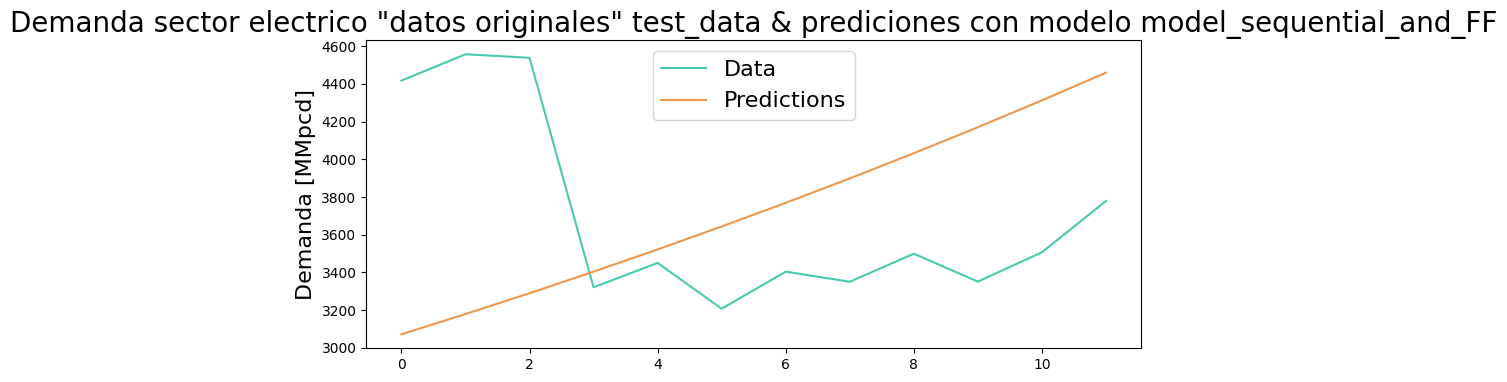

In [58]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'].values, color='#48C9B0')
plt.plot(test_predictions_model_FF_electrico_pretratamiento_media_reshaped , color='#EB984E')
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico "datos originales" test_data & prediciones con modelo model_sequential_and_FF', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

In [59]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_test_predictions_model_FF_electrico_pretratamiento_media = mean_absolute_percentage_error(demanda_electrico_original_test_data['Demanded_Gas'].values, test_predictions_model_FF_electrico_pretratamiento_media_reshaped )
RMSE_test_predictions_model_FF_electrico_pretratamiento_media = np.sqrt(mean_squared_error(demanda_electrico_original_test_data['Demanded_Gas'].values, test_predictions_model_FF_electrico_pretratamiento_media_reshaped ))

print('MAPE:', MAPE_test_predictions_model_FF_electrico_pretratamiento_media)
print('RMSE:', RMSE_test_predictions_model_FF_electrico_pretratamiento_media)

MAPE: 0.17855046951771916
RMSE: 815.574488695535
